In [13]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Create a 3D tensor of zeros directly on the GPU
    randn_tensor_gpu1 = torch.randn((3, 2, 4), device='cuda')
else:
    print("CUDA is not available. Tensor will be created on CPU.")
    randn_tensor_gpu2 = torch.randn((800, 800, 800))


CUDA is not available. Tensor will be created on CPU.


In [14]:
torch.cuda.is_available()

False

In [1]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: Number of epochs with no improvement after which training will be stopped.
        :param min_delta: Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


In [ ]:
# Get Markdown working and maybe add the tensorboard thing
# Add the device to the 
# Deleting plot but just keep the same one everytime. 
# Getting parameters right and running 
# Running for 500 epochs (goal)
# Get this going tomorrow. 

# Jobs to ARGON
# random spatial cropped
# Center spatial cropped
# Add device thing for argon


# Detach some stuff including the loss: loss.detach() or loss.tocpu()
# Also must adjust the number of training and validation images
# Should we load and save the optimizer?
# Patch size needs to be changed beore sending
# Might send the center spatial and random spatial transformation
# Might need to change batch size for training data
#  num_res_units=2?
# to_onehot_y=True ?
# Learning rate shceduling (LATER): cosine annealing
# Num epochs to be changed for argon
#Delete Image folder and visualization

In [21]:
import numpy as np
import nrrd


path = "z:/W-People/Nate/Deep_Learning_Data/Train/Case_68_Label.nrrd"

data, header = nrrd.read(path)
array = np.array(data)

np.unique(array)

array([0, 1, 2], dtype=int16)

Importing Modules
Monai imported. Importing Torch
Defining the create_dataset function...
Setting data paths...
Creating datasets...
Defining transformations...
Initializing data loaders...
Initializing U-Net model...
Model state loaded successfully.
Optimizer state loaded successfully.
Setting up loss function and optimizer...
Starting the training loop...

Reading in the first batch - T ..
Training Iteration: 0
Passing Through the Network
Loss Backward
Stepping Optimizer
Markdown file updated at ./visualization.md

Reading in the next batch - T [if any] ..
Training Iteration: 1
Passing Through the Network
Loss Backward
Stepping Optimizer
Markdown file updated at ./visualization.md

Reading in the next batch - T [if any] ..
Running the validation loop ..
Reading in the first batch - V ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./v

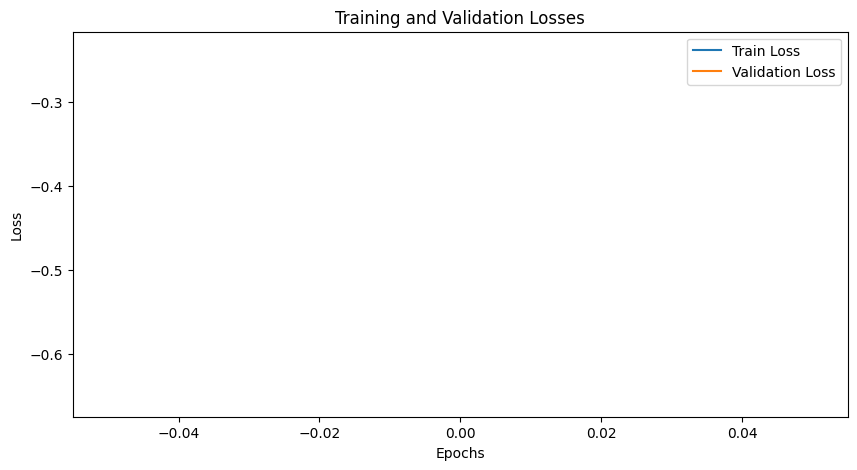

Epoch [1/3] - Train Loss: 0.5202, Val Loss: 0.7888

Reading in the first batch - T ..
Training Iteration: 0
Passing Through the Network
Loss Backward
Stepping Optimizer
Markdown file updated at ./visualization.md

Reading in the next batch - T [if any] ..
Training Iteration: 1
Passing Through the Network
Loss Backward
Stepping Optimizer
Markdown file updated at ./visualization.md

Reading in the next batch - T [if any] ..
Running the validation loop ..
Reading in the first batch - V ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..

Epoch: 1, Current Learning Rate: 9.999755730091188e-05
Plotting losses ..


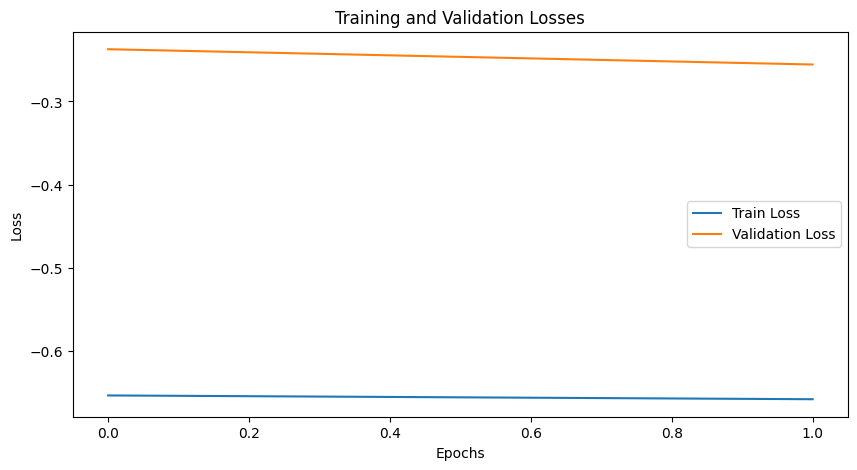

Epoch [2/3] - Train Loss: 0.5178, Val Loss: 0.7744

Reading in the first batch - T ..
Training Iteration: 0
Passing Through the Network
Loss Backward
Stepping Optimizer
Markdown file updated at ./visualization.md

Reading in the next batch - T [if any] ..
Training Iteration: 1
Passing Through the Network
Loss Backward
Stepping Optimizer
Markdown file updated at ./visualization.md

Reading in the next batch - T [if any] ..
Running the validation loop ..
Reading in the first batch - V ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..
Markdown file updated at ./visualization.md
Reading in the next batch - V [if any] ..

Epoch: 2, Current Learning Rate: 9.99972519676224e-05
Plotting losses ..


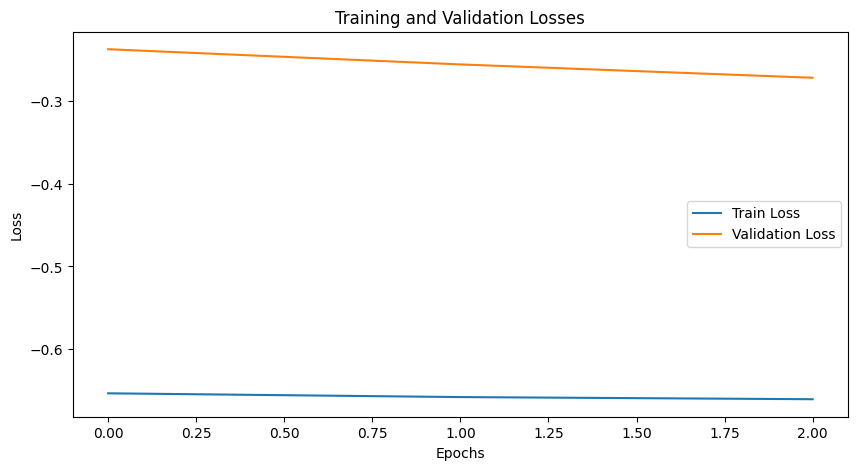

Epoch [3/3] - Train Loss: 0.5165, Val Loss: 0.7620


In [4]:
print("Importing Modules")
import os
from monai.transforms import (Compose, LoadImaged, EnsureChannelFirstd, RandSpatialCropd, CenterSpatialCropd, RandRotate90d, ToTensord, ScaleIntensityRanged)
from monai.networks.nets import UNet
from monai.losses import DiceLoss
from monai.data import Dataset, DataLoader
print("Monai imported. Importing Torch")
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np
import time 

md_file_path = "./visualization.md"



# image_folder = "./PNG/"

# if os.path.exists(md_file_path):
#     os.remove(md_file_path)

# if os.path.exists(md_file_path):
#     PNG

print("Defining the create_dataset function...")
# Function to create dataset
def create_dataset(data_dir):
    data_dicts = []
    for filename in os.listdir(data_dir):
        if filename.endswith("_Vx3.nrrd"):
            image_path = os.path.join(data_dir, filename)
            label_filename = filename.replace("_Vx3.nrrd", "_Label.nrrd")
            label_path = os.path.join(data_dir, label_filename)
            data_dicts.append({'image': image_path, 'label': label_path})
    return data_dicts

print("Setting data paths...")
# Set data paths
train_data_dir = "z:/W-People/Nate/Deep_Learning_Data/Train"
val_data_dir = "z:/W-People/Nate/Deep_Learning_Data/Validation"
model_save_path = "z:/W-People/Nate/Deep_Learning_Data/Nate_Unet(NEWTRY).pth"
optimizer_save_path = "z:/W-People/Nate/Deep_Learning_Data/Nate_Unet_optimizer(NEWTRY).pth"

print("Creating datasets...")
train_files = create_dataset(train_data_dir)
val_files = create_dataset(val_data_dir)

# Define the size of the cropped region
# roi_size = (128, 128, 128)
roi_size = (64, 64, 64) #####################################################################
print("Defining transformations...")
# Transformations
train_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    CenterSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    RandRotate90d(keys=['image', 'label'], prob=0.5),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])

val_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    RandSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])


print("Initializing data loaders...")
# Data Loaders
train_ds = Dataset(train_files, train_transforms)
val_ds = Dataset(val_files, val_transforms)
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=1)


print("Initializing U-Net model...")
# Model
net = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=3,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
)

# IMPORTANT FOR NUMBER OF EPOCHS
num_epochs = 3 # Example value
display_interval = 1 # Example value


loss_function = DiceLoss(to_onehot_y=True, softmax=True) ###############1
criterion = loss_function
optimizer = Adam(net.parameters(), 1e-3)
scheduler = CosineAnnealingLR(optimizer, T_max=2000, eta_min=1e-6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

if os.path.exists(model_save_path):
    net.load_state_dict(torch.load(model_save_path, map_location=device))
    print("Model state loaded successfully.")
if os.path.exists(optimizer_save_path):
    optimizer.load_state_dict(torch.load(optimizer_save_path))
    print("Optimizer state loaded successfully.")


print("Setting up loss function and optimizer...")
# Loss function and optimizer

# Training step
def train_step(batch_data, model, loss_function, optimizer, device):
    # print("Reading in the images")
    images, labels = batch_data['image'], batch_data['label']
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    print("Passing Through the Network")
    outputs = model(images)
    loss = loss_function(outputs, labels)
    print("Loss Backward")
    loss.backward()
    print("Stepping Optimizer")
    optimizer.step()
    return loss.item(), outputs

# # Visualization and saving function
# def visualize_and_save(inputs, outputs, labels, iteration, epoch):

#     with open(md_file_path, "a") as md_file:
#         slice_idx = inputs.shape[2] // 2
#         for i in range(inputs.shape[0]):
#             fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#             ax[0].imshow(labels[i, 0, :, :, slice_idx], cmap="gray")
#             ax[0].set_title("Ground Truth")
#             ax[1].imshow(outputs[i, 0, :, :, slice_idx].detach().cpu(), cmap="gray")
#             ax[1].set_title("Prediction")
#             img_path = f"./PNG/Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"
#             plt.savefig(img_path) #".\ABC.png"
#             plt.close()
#             md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")
#         md_file.close()

#     print(f"Markdown file updated at {md_file_path}")
# clippingmin = -1100
# clippingmax = 3000

def visualize_and_save_train(inputs, outputs, labels, iteration, epoch, num_train):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Red for arteries (1)
        [225, 0, 0]       # Blue for veins (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            # Get the input image and normalize it for visualization
            input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
            input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
            # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
            #                              (clippingmax - clippingmin)

            # Get the label and prediction volumes
            label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
            output_volume = outputs[i].detach().cpu().numpy()
            predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

            # Select the middle slice index after argmax reduction
            slice_idx = predicted_labels_volume.shape[0] // 2
            label_slice = label_volume[slice_idx]
            predicted_labels_slice = predicted_labels_volume[slice_idx]

            # Apply the color map to the label and prediction slices
            label_rgb_slice = color_map[label_slice]
            prediction_rgb_slice = color_map[predicted_labels_slice]

            # Create the plots
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            ax[0].imshow(input_slice_mid, cmap='gray', vmin = 0, vmax = 1)
            ax[0].set_title("Input")
            ax[1].imshow(label_rgb_slice)
            ax[1].set_title("Ground Truth")
            ax[2].imshow(prediction_rgb_slice)
            ax[2].set_title("Prediction")
            fig.suptitle(f'TRAINING-{num_train}', fontsize=16)
            img_path = f"./PNG/TRAINING-{num_train}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"

            # Save the image
            plt.savefig(img_path)
            plt.close()

            # Write to the markdown file
            md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")

def visualize_and_save_valid(inputs, outputs, labels, iteration, epoch, num):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Blue for A (1)
        [255, 0, 0]       # Red for V (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            # Get the input image and normalize it for visualization
            input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
            input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
            # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
            #                              (clippingmax - clippingmin)

            # Get the label and prediction volumes
            label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
            output_volume = outputs[i].detach().cpu().numpy()
            predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

            # Select the middle slice index after argmax reduction
            slice_idx = predicted_labels_volume.shape[0] // 2
            label_slice = label_volume[slice_idx]
            predicted_labels_slice = predicted_labels_volume[slice_idx]

            # Apply the color map to the label and prediction slices
            label_rgb_slice = color_map[label_slice]
            prediction_rgb_slice = color_map[predicted_labels_slice]

            # Create the plots
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            ax[0].imshow(input_slice_mid, cmap='gray', vmin = 0, vmax = 1)
            ax[0].set_title("Input")
            ax[1].imshow(label_rgb_slice)
            ax[1].set_title("Ground Truth")
            ax[2].imshow(prediction_rgb_slice)
            ax[2].set_title("Prediction")
            fig.suptitle(f'VALIDATION-{num}', fontsize=16)
            img_path = f"./PNG/VALIDATION-{num}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"

            # Save the image
            plt.savefig(img_path)
            plt.close()

            # Write to the markdown file
            md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")


# Loss Plotting Function
def plot_losses(train_losses, val_losses):
    lgtrainloss = np.log(train_losses)
    lgvalidloss = np.log(val_losses)
    plt.figure(figsize=(10, 5))
    plt.plot(lgtrainloss, label='Train Loss')
    plt.plot(lgvalidloss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.draw()
    plt.pause(0.001)



train_losses = []
val_losses = []
print("Starting the training loop...")
for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0
    num_train = 0
    # Training Phase
    net.train()
    print("\nReading in the first batch - T ..")
    for iteration, batch_data in enumerate(train_loader):
        print(f"Training Iteration: {iteration}")
        loss, output = train_step(batch_data, net, criterion, optimizer, device)
        epoch_train_loss += loss
        if iteration % display_interval == 0:
            visualize_and_save_train(batch_data['image'], output, batch_data['label'], iteration, epoch, num_train) 
        print("\nReading in the next batch - T [if any] ..")
        num_train = num_train + 1
    train_losses.append(epoch_train_loss / len(train_loader))
    
    print("Running the validation loop ..")
    # Validation Phase
    net.eval()
    num = 0
    with torch.no_grad():
        print("Reading in the first batch - V ..")
        for batch_data in val_loader:
            images, labels = batch_data['image'], batch_data['label']
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()
            if iteration % display_interval == 0:
                visualize_and_save_valid(batch_data['image'], outputs, batch_data['label'], iteration, epoch, num)
            print("Reading in the next batch - V [if any] ..")
            num = num + 1
        print()    
    scheduler.step()
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']
        print(f"Epoch: {epoch}, Current Learning Rate: {current_lr}")
    val_losses.append(epoch_val_loss / len(val_loader))

    # Plot Losses
    print("Plotting losses ..")
    plot_losses(train_losses, val_losses)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

plt.ioff()  # Turn off interactive mode
plt.show()  # Display final plots



torch.save(net.state_dict(), model_save_path)
torch.save(optimizer.state_dict(), optimizer_save_path)




In [ ]:
print("Importing Modules")

import os
from monai.transforms import (Spacingd, Compose, LoadImaged, EnsureChannelFirstd, RandSpatialCropd, CenterSpatialCropd, RandRotate90d, ToTensord, ScaleIntensityRanged)
from monai.networks.nets import UNet
from monai.losses import DiceLoss
from monai.data import Dataset, DataLoader
print("Monai imported. Importing Torch")
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
import time 
import numpy as np

starttime = time.time()
expdesc = "2 train 5 valid, roi_size = (128, 128, 128), RandSpatialCropd train,\
      RandSpatialCropd valid, train batch_size=4, num_res_units=2,\
         Cosine Annealing lr = 1e-3, eta_min=0, Tmax = 2000, num_epochs = 1400, using old data" # REMEBER TO CHANGE THIS EACH JOB
with open('expdesc.txt', 'w') as file:
    file.write(expdesc)

print(torch.cuda.is_available())
num_gpus = torch.cuda.device_count()
print(f"Number of available GPUs: {num_gpus}")

md_file_path = "./visualization.md"


print("\nDefining the create_dataset function...")
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
# Function to create dataset
def create_dataset(data_dir):
    data_dicts = []
    for filename in os.listdir(data_dir):
        if filename.endswith("_Vx3.nrrd"):
            image_path = os.path.join(data_dir, filename)
            label_filename = filename.replace("_Vx3.nrrd", "_Label.nrrd")
            label_path = os.path.join(data_dir, label_filename)
            data_dicts.append({'image': image_path, 'label': label_path})
    return data_dicts

print("Setting data paths...")
# Set data paths
train_data_dir = "../../TrainData/"
val_data_dir = "../../ValidationData/"
model_save_path = "./model/Nate_Unet.pth"
optimizer_save_path = "./model/Nate_Unet_optimizer.pth"

print("Creating datasets...")
train_files = create_dataset(train_data_dir)
val_files = create_dataset(val_data_dir)

downsampling_transform = Spacingd(
    keys=['image', 'label'], 
    pixdim=(0.8, 0.8, 0.8), 
    mode=('bilinear', 'nearest') ###############################################################
)

# Define the size of the cropped region
roi_size = (128, 128, 128)
# roi_size = (64, 64, 64)
print("Defining transformations...")
# Transformations
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
train_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    downsampling_transform, #####################################################################
    RandSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    RandRotate90d(keys=['image', 'label'], prob=0.5),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])

val_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    downsampling_transform,
    RandSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])


print("Initializing data loaders...")
# Data Loaders
train_ds = Dataset(train_files, train_transforms)
val_ds = Dataset(val_files, val_transforms)
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=4)


print("Initializing U-Net model...")
# Model
net = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=3,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
)
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
loss_function = DiceLoss(to_onehot_y=True, softmax=True) #########################################
criterion = loss_function
optimizer = Adam(net.parameters(), 1e-3)
scheduler = CosineAnnealingLR(optimizer, T_max=2000, eta_min=0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

if not os.path.exists("./model"):
    os.makedirs("./model", exist_ok=True)
if os.path.exists(model_save_path):
    net.load_state_dict(torch.load(model_save_path, map_location=device))
    print("Model state loaded successfully.")
if os.path.exists(optimizer_save_path):
    optimizer.load_state_dict(torch.load(optimizer_save_path))
    print("Optimizer state loaded successfully.")


print("Setting up loss function and optimizer...")
# Loss function and optimizer

# Training step
def train_step(batch_data, model, loss_function, optimizer, device):
    # print("Reading in the images")
    images, labels = batch_data['image'], batch_data['label']
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    print("Passing Through the Network")
    outputs = model(images)
    loss = loss_function(outputs, labels)
    print("Loss Backward")
    loss.backward()
    print("Stepping Optimizer")
    optimizer.step()
    return loss.item(), outputs

# Visualization and saving function
# def visualize_and_save(inputs, outputs, labels, iteration, epoch):

#     if not os.path.exists("./PNG"):
#         os.makedirs("./PNG", exist_ok=True)

#     with open(md_file_path, "a") as md_file:
#         slice_idx = inputs.shape[2] // 2
#         for i in range(inputs.shape[0]):
#             fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#             ax[0].imshow(labels[i, 0, :, :, slice_idx], cmap="gray")
#             ax[0].set_title("Ground Truth")
#             ax[1].imshow(outputs[i, 0, :, :, slice_idx].detach().cpu(), cmap="gray")
#             ax[1].set_title("Prediction")
#             img_path = f"./PNG/Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"
#             plt.savefig(img_path) #".\ABC.png"
#             plt.close()
#             md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")
#         md_file.close()

#     print(f"Markdown file updated at {md_file_path}")
# clippingmin = -1100
# clippingmax = 3000 #############################################################################

def visualize_and_save_train(inputs, outputs, labels, iteration, epoch, num_train):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Red for arteries (1)
        [225, 0, 0]       # Blue for veins (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            if i < inputs.shape[0]:
                # Get the input image and normalize it for visualization
                input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
                input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
                # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
                #                             (clippingmax - clippingmin)

                # Get the label and prediction volumes
                label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
                output_volume = outputs[i].detach().cpu().numpy()
                predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

                # Select the middle slice index after argmax reduction
                slice_idx = predicted_labels_volume.shape[0] // 2
                label_slice = label_volume[slice_idx]
                predicted_labels_slice = predicted_labels_volume[slice_idx]

                # Apply the color map to the label and prediction slices
                label_rgb_slice = color_map[label_slice]
                prediction_rgb_slice = color_map[predicted_labels_slice]

                # Create the plots
                fig, ax = plt.subplots(1, 3, figsize=(15, 5))
                ax[0].imshow(input_slice_mid, cmap='gray')
                ax[0].set_title("Input")
                ax[1].imshow(label_rgb_slice)
                ax[1].set_title("Ground Truth")
                ax[2].imshow(prediction_rgb_slice)
                ax[2].set_title("Prediction")
                fig.suptitle(f'TRAINING-{num_train}', fontsize=16)
                img_path = f"./PNG/TRAINING-{num_train}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"

                # Save the image
                plt.savefig(img_path)
                plt.close()

                # Write to the markdown file
                md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")

def visualize_and_save_valid(inputs, outputs, labels, iteration, epoch, num):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Blue for A (1)
        [255, 0, 0]       # Red for V (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            if i < inputs.shape[0]:
                # Get the input image and normalize it for visualization
                input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
                input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
                # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
                #                             (clippingmax - clippingmin)

                # Get the label and prediction volumes
                label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
                output_volume = outputs[i].detach().cpu().numpy()
                predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

                # Select the middle slice index after argmax reduction
                slice_idx = predicted_labels_volume.shape[0] // 2
                label_slice = label_volume[slice_idx]
                predicted_labels_slice = predicted_labels_volume[slice_idx]

                # Apply the color map to the label and prediction slices
                label_rgb_slice = color_map[label_slice]
                prediction_rgb_slice = color_map[predicted_labels_slice]

                # Create the plots
                fig, ax = plt.subplots(1, 3, figsize=(15, 5))
                ax[0].imshow(input_slice_mid, cmap='gray')
                ax[0].set_title("Input")
                ax[1].imshow(label_rgb_slice)
                ax[1].set_title("Ground Truth")
                ax[2].imshow(prediction_rgb_slice)
                ax[2].set_title("Prediction")
                fig.suptitle(f'VALIDATION-{num}', fontsize=16)
                img_path = f"./PNG/VALIDATION-{num}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"

                # Save the image
                plt.savefig(img_path)
                plt.close()

                # Write to the markdown file
                md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")


# Loss Plotting Function
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.draw()
    plt.pause(0.001)
    plt.savefig("./PNG/lossfunction.png")

# Main training loop
num_epochs = 1400 # Example value
display_interval = 1 # Example value

train_losses = []
val_losses = []
print("Starting the training loop...")
for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0
    num_train = 0

    # Training Phase
    net.train()
    print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
    print("\nReading in the first batch - T ..")
    for iteration, batch_data in enumerate(train_loader):
        print(f"Training Iteration: {iteration}")
        loss, output = train_step(batch_data, net, criterion, optimizer, device)
        epoch_train_loss += loss
        if iteration % display_interval == 0:
            visualize_and_save_train(batch_data['image'], output, batch_data['label'], iteration, epoch, num_train) 
        print("\nReading in the next batch - T [if any] ..")
        num_train = num_train + 1
    train_losses.append(epoch_train_loss / len(train_loader))
    print("Running the validation loop ..")
    
    # Validation Phase
    net.eval()
    num = 0
    with torch.no_grad():
        print("Reading in the first batch - V ..")
        for batch_data in val_loader:
            images, labels = batch_data['image'], batch_data['label']
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()
            if iteration % display_interval == 0:
                visualize_and_save_valid(batch_data['image'], output, batch_data['label'], iteration, epoch, num) 
            print("Reading in the next batch - V [if any] ..")
            num = num + 1
        print()    
    
    val_losses.append(epoch_val_loss / len(val_loader))
    scheduler.step()
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']
        print(f"Epoch: {epoch}, Current Learning Rate: {current_lr}")
    # Plot Losses
    print("Plotting losses ..")
    plot_losses(train_losses, val_losses)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# plt.ioff()  # Turn off interactive mode
# plt.show()  # Display final plots

torch.save(net.state_dict(), model_save_path)
torch.save(optimizer.state_dict(), optimizer_save_path)

print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")

In [ ]:
The 'colormap' trait of an IsoSurfaceFactory instance must be 'Accent' or 'Blues' or 'BrBG' or 'BuGn' or 'BuPu' or 'CMRmap' or 'Dark2' or 'GnBu' or 'Greens' or 'Greys' or 'OrRd' or 'Oranges' or 'PRGn' or 'Paired' or 'Pastel1' or 'Pastel2' or 'PiYG' or 'PuBu' or 'PuBuGn' or 'PuOr' or 'PuRd' or 'Purples' or 'RdBu' or 'RdGy' or 'RdPu' or 'RdYlBu' or 'RdYlGn' or 'Reds' or 'Set1' or 'Set2' or 'Set3' or 'Spectral' or 'Vega10' or 'Vega20' or 'Vega20b' or 'Vega20c' or 'Wistia' or 'YlGn' or 'YlGnBu' or 'YlOrBr' or 'YlOrRd' or 'afmhot' or 'autumn' or 'binary' or 'black-white' or 'blue-red' or 'bone' or 'brg' or 'bwr' or 'cool' or 'coolwarm' or 'copper' or 'cubehelix' or 'file' or 'flag' or 'gist_earth' or 'gist_gray' or 'gist_heat' or 'gist_ncar' or 'gist_rainbow' or 'gist_stern' or 'gist_yarg' or 'gnuplot' or 'gnuplot2' or 'gray' or 'hot' or 'hsv' or 'inferno' or 'jet' or 'magma' or 'nipy_spectral' or 'ocean' or 'pink' or 'plasma' or 'prism' or 'rainbow' or 'seismic' or 'spectral' or 'spring' or 'summer' or 'terrain' or 'viridis' or 'winter',

In [ ]:
# Problems to be fixed
# input volume should be ct image,,, when showing that in mayavi WHAT ARE YOU ACTUALLY SHOWING?
# do use contour 3d
# Add early stopping make epochs 200 
# first experiment add 5 images in validation train with two images
# try to get the best thing we can get just from two images first
# use the exact same 5 for validation
# ask chat gpt for creating a report (capabilities in monai)
# Change learning rate maybe add adaptive learning rate


In [ ]:
from mayavi import mlab
import numpy as np

def visualize_predictions_3d(loader, model, device, num_volumes=1):
    model.eval()
    with torch.no_grad():
        batch = next(iter(loader))
        inputs, targets = batch['image'], batch['label']
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)

        # Convert model output to binary predictions
        predicted_labels = outputs.argmax(dim=1, keepdim=True)

        for i in range(min(num_volumes, len(inputs))):
            # Reconstruct 3D volumes
            input_volume = inputs[i].cpu().squeeze().numpy()
            target_volume = targets[i].cpu().squeeze().numpy()
            predicted_volume = predicted_labels[i].cpu().squeeze().numpy()

            # Set up a figure
            fig = mlab.figure(size=(800, 800), bgcolor=(0, 0, 0))

            # Visualize original grayscale image volume
            # Adjust the visualization to correctly display the grayscale volume
            # The 'volume' function is used for volume rendering of scalar data
            mlab.pipeline.volume(mlab.pipeline.scalar_field(input_volume), figure=fig)

            # Visualize true label volume
            # Assuming target_volume contains discrete labels for segmentation
            mlab.contour3d(target_volume, contours=2, color=(0, 1, 0), transparent=True, figure=fig)

            # Visualize predicted label volume
            # Assuming predicted_volume contains discrete labels for segmentation
            mlab.contour3d(predicted_volume, contours=2, color=(1, 0, 0), transparent=True, figure=fig)

            # Display the visualization
            mlab.show()

# Call the function with appropriate parameters
visualize_predictions_3d(val_loader, model, device)


In [13]:
from mayavi import mlab
import numpy as np

def visualize_predictions_3d(loader, model, device, num_volumes=1):
    model.eval()
    with torch.no_grad():
        batch = next(iter(loader))
        inputs, targets = batch['image'], batch['label']
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)

        # Convert model output to binary predictions
        predicted_labels = outputs.argmax(dim=1, keepdim=True)

        for i in range(min(num_volumes, len(inputs))):
            # Reconstruct 3D volumes
            input_volume = inputs[i].cpu().squeeze().numpy()
            target_volume = targets[i].cpu().squeeze().numpy()
            predicted_volume = predicted_labels[i].cpu().squeeze().numpy()

            # Set up a figure
            fig = mlab.figure(size=(800, 800), bgcolor = (0,0,0))

            # Visualize original image volume
            mlab.contour3d(input_volume, contours=[input_volume.max()/2], color=(0, 0, 1), transparent=True, figure=fig)

            # Visualize true label volume
            mlab.contour3d(target_volume, contours=[target_volume.max()/2], color=(0, 1, 0), transparent=True, figure=fig)

            # Visualize predicted label volume
            mlab.contour3d(predicted_volume, contours=[predicted_volume.max()/2], color=(1, 0, 0), transparent=True, figure=fig)

            # Display the visualization
            mlab.show()

# Call the function with appropriate parameters
visualize_predictions_3d(val_loader, model, device)





In [7]:
from mayavi import mlab
import torch
import numpy as np

def visualize_predictions_3d(loader, model, device, num_volumes=1):
    model.eval()
    with torch.no_grad():
        batch = next(iter(loader))
        inputs, targets = batch['image'], batch['label']
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)

        # Convert model output to binary predictions
        predicted_labels = outputs.argmax(dim=1, keepdim=True)

        for i in range(min(num_volumes, len(inputs))):
            # Reconstruct 3D volumes
            input_volume = inputs[i].cpu().squeeze().numpy()
            target_volume = targets[i].cpu().squeeze().numpy()
            predicted_volume = predicted_labels[i].cpu().squeeze().numpy()

            # Set up a figure
            fig = mlab.figure(size=(800, 800), bgcolor=(0, 0, 0))

            # Visualize true label volume
            target_src = mlab.pipeline.scalar_field(target_volume)
            mlab.pipeline.iso_surface(target_src, contours=[target_volume.max() * 0.5], 
                                      colormap='winter', opacity=.5, figure=fig)

            # Visualize predicted label volume
            predicted_src = mlab.pipeline.scalar_field(predicted_volume)
            mlab.pipeline.iso_surface(predicted_src, contours=[predicted_volume.max() * 0.5], 
                                      colormap='rainbow', opacity=1, figure=fig)

            # Add legends and annotations
            mlab.text(0.01, 0.01, "Target Volume", color=(0, 0, 1), width=0.15, figure=fig)
            mlab.text(0.01, 0.95, "Predicted Volume", color=(1, 0, 0), width=0.15, figure=fig)

            # Display the visualization
            mlab.show()

# Assuming val_loader, model, and device have been defined elsewhere in your script:
visualize_predictions_3d(val_loader, model, device)


In [4]:
import monai.networks.nets as nets

# List all classes and functions in monai.networks.nets
print(dir(nets))

['AHNet', 'AHnet', 'Ahnet', 'AttentionUnet', 'AutoEncoder', 'BasicUNet', 'BasicUNetPlusPlus', 'BasicUnet', 'BasicUnetPlusPlus', 'Basicunet', 'BasicunetPlusPlus', 'BertAttention', 'BertMixedLayer', 'BertOutput', 'BertPreTrainedModel', 'BlockArgs', 'Classifier', 'Critic', 'DAF3D', 'DenseNet', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'DenseNet264', 'Densenet', 'Densenet121', 'Densenet169', 'Densenet201', 'Densenet264', 'DiNTS', 'Discriminator', 'DynUNet', 'DynUnet', 'Dynunet', 'EfficientNet', 'EfficientNetBN', 'EfficientNetBNFeatures', 'EfficientNetEncoder', 'FLEXUNET_BACKBONE', 'FlexUNet', 'FlexUNetEncoderRegister', 'FlexibleUNet', 'FullyConnectedNet', 'Generator', 'GlobalNet', 'HighResBlock', 'HighResNet', 'HoVerNet', 'HoVernet', 'HoverNet', 'Hovernet', 'LocalNet', 'MILModel', 'MultiModal', 'NetAdapter', 'PatchMerging', 'PatchMergingV2', 'Pooler', 'Quicknat', 'RegUNet', 'Regressor', 'ResNet', 'ResNetBlock', 'ResNetBottleneck', 'SENet', 'SENet154', 'SEResNeXt101', 'SEResNeXt50', 'SER

In [ ]:
import subprocess

def list_installed_packages(file_name):
    try:
        # Running 'pip list' command and capturing the output
        installed_packages = subprocess.check_output([sys.executable, '-m', 'pip', 'list'], universal_newlines=True)

        # Writing the output to a file
        with open(file_name, 'w') as file:
            file.write(installed_packages)

        print(f"List of installed packages written to {file_name}")
    except subprocess.CalledProcessError as e:
        print("An error occurred while retrieving the list of installed packages.")
        print(e)

if __name__ == "__main__":
    # Specify the name of the file where you want to save the list
    output_file = "installed_packages_Nate.txt"
    list_installed_packages(output_file)


In [2]:
import time
starttime = time.time()
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")

Elapsed: 0.00 Minutes


In [ ]:
#JOB 7



print("Importing Modules")

import os
from monai.transforms import (Spacingd, Compose, LoadImaged, EnsureChannelFirstd, RandSpatialCropd, CenterSpatialCropd, RandRotate90d, ToTensord, ScaleIntensityRanged)
from monai.networks.nets import UNet
from monai.losses import DiceLoss
from monai.data import Dataset, DataLoader
print("Monai imported. Importing Torch")
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
import time 
import numpy as np

starttime = time.time()
expdesc = "2 train 5 valid, roi_size = (128, 128, 128), RandSpatialCropd train,\
      RandSpatialCropd valid, train batch_size=4, num_res_units=2,\
         Cosine Annealing lr = 1e-3, eta_min=0, Tmax = 4000, num_epochs = 2000, using old data" # REMEBER TO CHANGE THIS EACH JOB
with open('expdesc.txt', 'w') as file:
    file.write(expdesc)

print(torch.cuda.is_available())
num_gpus = torch.cuda.device_count()
print(f"Number of available GPUs: {num_gpus}")

md_file_path = "./visualization.md"


print("\nDefining the create_dataset function...")
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
# Function to create dataset


# def create_dataset(data_dir):
#     data_dicts = []
#     for filename in os.listdir(data_dir):
#         if filename.endswith("_Vx3.nrrd"):
#             image_path = os.path.join(data_dir, filename)
#             label_filename = filename.replace("_Vx3.nrrd", "_Label.nrrd")
#             label_path = os.path.join(data_dir, label_filename)
#             data_dicts.append({'image': image_path, 'label': label_path, 'filename': filename})
#     return data_dicts






def create_dataset(data_dir, label_dir):
    data_dicts = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".nrrd"):
            image_path = os.path.join(data_dir, filename)
            label_path = os.path.join(label_dir, filename)
            # Include the filename in the dictionary
            data_dicts.append({'image': image_path, 'label': label_path, 'filename': filename})
    return data_dicts





print("Setting data paths...")
# Set data paths

print("Setting data paths...")
# # Set data paths
train_data_dir = "../../TrainDataOld/"
train_label_dir = "../../TrainDataOld/labels/"
val_data_dir = "../../ValidationDataOld/"
val_label_dir = "../../ValidationDataOld/labels/"

print("Creating datasets...")
train_files = create_dataset(train_data_dir, train_label_dir)
val_files = create_dataset(val_data_dir, val_label_dir)

# train_data_dir = "../../TrainData/"
# val_data_dir = "../../ValidationData/"
model_save_path = "./model/Nate_Unet.pth"
optimizer_save_path = "./model/Nate_Unet_optimizer.pth"

# print("Creating datasets...")
# train_files = create_dataset(train_data_dir)
# val_files = create_dataset(val_data_dir)

downsampling_transform = Spacingd(
    keys=['image', 'label'], 
    pixdim=(0.8, 0.8, 0.8), 
    mode=('bilinear', 'nearest') ###############################################################
)

# Define the size of the cropped region
roi_size = (128, 128, 128)
# roi_size = (64, 64, 64)
print("Defining transformations...")
# Transformations
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
train_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    downsampling_transform, #####################################################################
    RandSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    RandRotate90d(keys=['image', 'label'], prob=0.5),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])

val_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    downsampling_transform,
    RandSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])


print("Initializing data loaders...")
# Data Loaders
train_ds = Dataset(train_files, train_transforms)
val_ds = Dataset(val_files, val_transforms)
train_loader = DataLoader(train_ds, batch_size=4, shuffle=False)
val_loader = DataLoader(val_ds, batch_size=4)


print("Initializing U-Net model...")
# Model
net = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=3,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
)
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
loss_function = DiceLoss(to_onehot_y=True, softmax=True) #########################################
criterion = loss_function
optimizer = Adam(net.parameters(), 1e-3)
scheduler = CosineAnnealingLR(optimizer, T_max=2000, eta_min=1e-6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

if not os.path.exists("./model"):
    os.makedirs("./model", exist_ok=True)
if os.path.exists(model_save_path):
    net.load_state_dict(torch.load(model_save_path, map_location=device))
    print("Model state loaded successfully.")
if os.path.exists(optimizer_save_path):
    optimizer.load_state_dict(torch.load(optimizer_save_path))
    print("Optimizer state loaded successfully.")


print("Setting up loss function and optimizer...")
# Loss function and optimizer

# Training step


# Visualization and saving function
# def visualize_and_save(inputs, outputs, labels, iteration, epoch):

#     if not os.path.exists("./PNG"):
#         os.makedirs("./PNG", exist_ok=True)

#     with open(md_file_path, "a") as md_file:
#         slice_idx = inputs.shape[2] // 2
#         for i in range(inputs.shape[0]):
#             fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#             ax[0].imshow(labels[i, 0, :, :, slice_idx], cmap="gray")
#             ax[0].set_title("Ground Truth")
#             ax[1].imshow(outputs[i, 0, :, :, slice_idx].detach().cpu(), cmap="gray")
#             ax[1].set_title("Prediction")
#             img_path = f"./PNG/Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"
#             plt.savefig(img_path) #".\ABC.png"
#             plt.close()
#             md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")
#         md_file.close()

#     print(f"Markdown file updated at {md_file_path}")
# clippingmin = -1100
# clippingmax = 3000 #############################################################################

def visualize_and_save_train(inputs, outputs, labels, iteration, epoch, num_train):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Red for arteries (1)
        [225, 0, 0]       # Blue for veins (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            if i < inputs.shape[0]:
                # Get the input image and normalize it for visualization
                input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
                input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
                # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
                #                             (clippingmax - clippingmin)

                # Get the label and prediction volumes
                label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
                output_volume = outputs[i].detach().cpu().numpy()
                predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

                # Select the middle slice index after argmax reduction
                slice_idx = predicted_labels_volume.shape[0] // 2
                label_slice = label_volume[slice_idx]
                predicted_labels_slice = predicted_labels_volume[slice_idx]

                # Apply the color map to the label and prediction slices
                label_rgb_slice = color_map[label_slice]
                prediction_rgb_slice = color_map[predicted_labels_slice]

                # Create the plots
                fig, ax = plt.subplots(1, 3, figsize=(15, 5))
                ax[0].imshow(input_slice_mid, cmap='gray')
                ax[0].set_title("Input")
                ax[1].imshow(label_rgb_slice)
                ax[1].set_title("Ground Truth")
                ax[2].imshow(prediction_rgb_slice)
                ax[2].set_title("Prediction")
                fig.suptitle(f'TRAINING-{num_train}', fontsize=16)
                img_path = f"./PNG/TRAINING-{num_train}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"
                print(f"TRAINING-{num_train}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png")
                # Save the image
                plt.savefig(img_path)
                plt.close()

                # Write to the markdown file
                md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")

def visualize_and_save_valid(inputs, outputs, labels, iteration, epoch, num):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Blue for A (1)
        [255, 0, 0]       # Red for V (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            if i < inputs.shape[0]:
                # Get the input image and normalize it for visualization
                input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
                input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
                # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
                #                             (clippingmax - clippingmin)

                # Get the label and prediction volumes
                label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
                output_volume = outputs[i].detach().cpu().numpy()
                predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

                # Select the middle slice index after argmax reduction
                slice_idx = predicted_labels_volume.shape[0] // 2
                label_slice = label_volume[slice_idx]
                predicted_labels_slice = predicted_labels_volume[slice_idx]

                # Apply the color map to the label and prediction slices
                label_rgb_slice = color_map[label_slice]
                prediction_rgb_slice = color_map[predicted_labels_slice]

                # Create the plots
                fig, ax = plt.subplots(1, 3, figsize=(15, 5))
                ax[0].imshow(input_slice_mid, cmap='gray')
                ax[0].set_title("Input")
                ax[1].imshow(label_rgb_slice)
                ax[1].set_title("Ground Truth")
                ax[2].imshow(prediction_rgb_slice)
                ax[2].set_title("Prediction")
                fig.suptitle(f'VALIDATION-{num}', fontsize=16)
                img_path = f"./PNG/VALIDATION-{num}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"
                print(f"VALIDATION-{num}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png")
                # Save the image
                plt.savefig(img_path)
                plt.close()

                # Write to the markdown file
                md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")


# Loss Plotting Function
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.draw()
    plt.pause(0.001)
    plt.savefig("./PNG/lossfunction.png")

# Main training loop
num_epochs = 1000 # Example value
display_interval = 1 # Example value


def train_step(batch_data, model, loss_function, optimizer, device):
    # print("Reading in the images")
    print(f"Processing filenames: {batch_data['filename']}")
    images, labels = batch_data['image'], batch_data['label']
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    print("Passing Through the Network")
    outputs = model(images)

    print(f"Output shape: {outputs.shape}, Label shape: {labels.shape}")
    print("Label tensor values (sample):", labels[0, :, 0, 0, 0])
    if torch.any(labels == 3):
        print(f"Filename with label 3: {batch_data['filename']}")

    loss = loss_function(outputs, labels)
    print("Loss Backward")
    loss.backward()
    print("Stepping Optimizer")
    optimizer.step()
    return loss.item(), outputs


train_losses = []
val_losses = []
print("Starting the training loop...")
for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0
    

    # Training Phase
    net.train()
    num_train = 0
    print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
    print("\nReading in the first batch - T ..")
    for iteration, batch_data in enumerate(train_loader):
        print(f"Training Iteration: {iteration}")
        loss, output = train_step(batch_data, net, criterion, optimizer, device)
        epoch_train_loss += loss
        if iteration % display_interval == 0:
            visualize_and_save_train(batch_data['image'], output, batch_data['label'], iteration, epoch, num_train) 
        print("\nReading in the next batch - T [if any] ..")
        num_train = num_train + 1
    train_losses.append(epoch_train_loss / len(train_loader))
    print("Running the validation loop ..")
    
    # Validation Phase
    net.eval()
    num = 0
    with torch.no_grad():
        print("Reading in the first batch - V ..")
        for batch_data in val_loader:
            images, labels = batch_data['image'], batch_data['label']
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)

            print(f"Validation - Output shape: {outputs.shape}, Label shape: {labels.shape}")

            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()
            if iteration % display_interval == 0:
                visualize_and_save_valid(batch_data['image'], outputs, batch_data['label'], iteration, epoch, num) 
            print("Reading in the next batch - V [if any] ..")
            num = num + 1
        print()    
    
    val_losses.append(epoch_val_loss / len(val_loader))
    scheduler.step()
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']
        print(f"Epoch: {epoch}, Current Learning Rate: {current_lr}")
    # Plot Losses
    print("Plotting losses ..")
    plot_losses(train_losses, val_losses)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# plt.ioff()  # Turn off interactive mode
# plt.show()  # Display final plots

torch.save(net.state_dict(), model_save_path)
torch.save(optimizer.state_dict(), optimizer_save_path)

print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")

In [ ]:
#utilize multiple GPUs

if torch.cuda.is_available():
    device = torch.device("cuda")
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")
    if num_gpus > 1:
        net = torch.nn.DataParallel(net)  # Wrap the model with DataParallel
    net.to(device)
else:
    device = torch.device("cpu")
    net.to(device)

In [ ]:
###################################################
#                    Job7                         #
#         See Nate One Note for More Info         #
#             Utilize Multiple GPUs               #
#           Works on HPC currently (.py)          #
###################################################     


print("Importing Modules")

import os
from monai.transforms import (Spacingd, Compose, LoadImaged, EnsureChannelFirstd, RandSpatialCropd, CenterSpatialCropd, RandRotate90d, ToTensord, ScaleIntensityRanged, SpatialPadd)
from monai.networks.nets import UNet
from monai.losses import DiceLoss
from monai.data import Dataset, DataLoader, pad_list_data_collate
print("Monai imported. Importing Torch")
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
import time 
import numpy as np

starttime = time.time()
expdesc = "2 train 5 valid, roi_size = (128, 128, 128), RandSpatialCropd train,\
      RandSpatialCropd valid, train batch_size=4, num_res_units=2,\
         Cosine Annealing lr = 1e-3, eta_min=0, Tmax = 4000, num_epochs = 2000, using old data" # REMEBER TO CHANGE THIS EACH JOB
with open('expdesc.txt', 'w') as file:
    file.write(expdesc)

print(torch.cuda.is_available())
num_gpus = torch.cuda.device_count()
print(f"Number of available GPUs: {num_gpus}")

md_file_path = "./visualization.md"


print("\nDefining the create_dataset function...")
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
# Function to create dataset


# def create_dataset(data_dir):
#     data_dicts = []
#     for filename in os.listdir(data_dir):
#         if filename.endswith("_Vx3.nrrd"):
#             image_path = os.path.join(data_dir, filename)
#             label_filename = filename.replace("_Vx3.nrrd", "_Label.nrrd")
#             label_path = os.path.join(data_dir, label_filename)
#             data_dicts.append({'image': image_path, 'label': label_path, 'filename': filename})
#     return data_dicts






def create_dataset(data_dir, label_dir):
    data_dicts = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".nrrd"):
            image_path = os.path.join(data_dir, filename)
            label_path = os.path.join(label_dir, filename)
            # Include the filename in the dictionary
            data_dicts.append({'image': image_path, 'label': label_path, 'filename': filename})
    return data_dicts





print("Setting data paths...")
# Set data paths

print("Setting data paths...")
# # Set data paths
train_data_dir = "../../TrainDataOld/"
train_label_dir = "../../TrainDataOld/labels/"
val_data_dir = "../../ValidationDataOld/"
val_label_dir = "../../ValidationDataOld/labels/"

print("Creating datasets...")
train_files = create_dataset(train_data_dir, train_label_dir)
val_files = create_dataset(val_data_dir, val_label_dir)

# train_data_dir = "../../TrainData/"
# val_data_dir = "../../ValidationData/"
model_save_path = "./model/Nate_Unet.pth"
optimizer_save_path = "./model/Nate_Unet_optimizer.pth"

# print("Creating datasets...")
# train_files = create_dataset(train_data_dir)
# val_files = create_dataset(val_data_dir)

downsampling_transform = Spacingd(
    keys=['image', 'label'], 
    pixdim=(0.8, 0.8, 0.8), 
    mode=('bilinear', 'nearest') ###############################################################
)

# Define the size of the cropped region
roi_size = (128, 128, 128)
# roi_size = (64, 64, 64)
print("Defining transformations...")
# Transformations
print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
train_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    downsampling_transform, #####################################################################
    SpatialPadd(keys=['image', 'label'], spatial_size=roi_size, method='symmetric'),  # Add padding here
    RandSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    RandRotate90d(keys=['image', 'label'], prob=0.5),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])

val_transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    downsampling_transform,
    SpatialPadd(keys=['image', 'label'], spatial_size=roi_size, method='symmetric'),  # Add padding here
    RandSpatialCropd(keys=['image', 'label'], roi_size=roi_size),
    ScaleIntensityRanged(keys=['image'], a_min=-1100, a_max=3000, b_min=0.0, b_max=1.0, clip=True),
    ToTensord(keys=['image', 'label']),
])


print("Initializing data loaders...")
# Data Loaders
train_ds = Dataset(train_files, train_transforms)
val_ds = Dataset(val_files, val_transforms)
train_loader = DataLoader(train_ds, batch_size=4, shuffle=False, collate_fn=pad_list_data_collate)
val_loader = DataLoader(val_ds, batch_size=4, collate_fn=pad_list_data_collate)


print("Initializing U-Net model...")
# Model
net = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=3,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
)

if torch.cuda.is_available():
    device = torch.device("cuda")
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")
    if num_gpus > 1:
        net = torch.nn.DataParallel(net)  # Wrap the model with DataParallel
    net.to(device)
else:
    device = torch.device("cpu")
    net.to(device)

print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
loss_function = DiceLoss(to_onehot_y=True, softmax=True) #########################################
criterion = loss_function
optimizer = Adam(net.parameters(), 1e-3)
scheduler = CosineAnnealingLR(optimizer, T_max=2000, eta_min=1e-6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

if not os.path.exists("./model"):
    os.makedirs("./model", exist_ok=True)
if os.path.exists(model_save_path):
    net.load_state_dict(torch.load(model_save_path, map_location=device))
    print("Model state loaded successfully.")
if os.path.exists(optimizer_save_path):
    optimizer.load_state_dict(torch.load(optimizer_save_path))
    print("Optimizer state loaded successfully.")


print("Setting up loss function and optimizer...")


def visualize_and_save_train(inputs, outputs, labels, iteration, epoch, num_train):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Red for arteries (1)
        [225, 0, 0]       # Blue for veins (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            if i < inputs.shape[0]:
                # Get the input image and normalize it for visualization
                input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
                input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
                # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
                #                             (clippingmax - clippingmin)

                # Get the label and prediction volumes
                label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
                output_volume = outputs[i].detach().cpu().numpy()
                predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

                # Select the middle slice index after argmax reduction
                slice_idx = predicted_labels_volume.shape[0] // 2
                label_slice = label_volume[slice_idx]
                predicted_labels_slice = predicted_labels_volume[slice_idx]

                # Apply the color map to the label and prediction slices
                label_rgb_slice = color_map[label_slice]
                prediction_rgb_slice = color_map[predicted_labels_slice]

                # Create the plots
                fig, ax = plt.subplots(1, 3, figsize=(15, 5))
                ax[0].imshow(input_slice_mid, cmap='gray')
                ax[0].set_title("Input")
                ax[1].imshow(label_rgb_slice)
                ax[1].set_title("Ground Truth")
                ax[2].imshow(prediction_rgb_slice)
                ax[2].set_title("Prediction")
                fig.suptitle(f'TRAINING-{num_train}', fontsize=16)
                img_path = f"./PNG/TRAINING-{num_train}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"
                print(f"TRAINING-{num_train}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png")
                # Save the image
                plt.savefig(img_path)
                plt.close()

                # Write to the markdown file
                md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")

def visualize_and_save_valid(inputs, outputs, labels, iteration, epoch, num):
    color_map = np.array([
        [255, 255, 255],  # White for background (0)
        [0, 0, 255],      # Blue for A (1)
        [255, 0, 0]       # Red for V (2)
    ], dtype=np.uint8)



    with open(md_file_path, "a") as md_file:
        for i in range(outputs.shape[0]):  # Iterate over the batch dimension
            if i < inputs.shape[0]:
                # Get the input image and normalize it for visualization
                input_slice = inputs[i, 0, :, :, :].detach().cpu().numpy()
                input_slice_mid = input_slice[input_slice.shape[0] // 2]  # Middle slice of the input volume
                # input_slice_mid_normalized = (input_slice_mid - clippingmin) / \
                #                             (clippingmax - clippingmin)

                # Get the label and prediction volumes
                label_volume = labels[i, 0].cpu().numpy().astype(np.uint8)
                output_volume = outputs[i].detach().cpu().numpy()
                predicted_labels_volume = np.argmax(output_volume, axis=0).astype(np.uint8)

                # Select the middle slice index after argmax reduction
                slice_idx = predicted_labels_volume.shape[0] // 2
                label_slice = label_volume[slice_idx]
                predicted_labels_slice = predicted_labels_volume[slice_idx]

                # Apply the color map to the label and prediction slices
                label_rgb_slice = color_map[label_slice]
                prediction_rgb_slice = color_map[predicted_labels_slice]

                # Create the plots
                fig, ax = plt.subplots(1, 3, figsize=(15, 5))
                ax[0].imshow(input_slice_mid, cmap='gray')
                ax[0].set_title("Input")
                ax[1].imshow(label_rgb_slice)
                ax[1].set_title("Ground Truth")
                ax[2].imshow(prediction_rgb_slice)
                ax[2].set_title("Prediction")
                fig.suptitle(f'VALIDATION-{num}', fontsize=16)
                img_path = f"./PNG/VALIDATION-{num}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png"
                print(f"VALIDATION-{num}_Epoch-{epoch}_iteration-{iteration}_batch-{i}.png")
                # Save the image
                plt.savefig(img_path)
                plt.close()

                # Write to the markdown file
                md_file.write(f"![Epoch-{epoch} Iteration-{iteration} Batch-{i}]({img_path})\n\n")

    print(f"Markdown file updated at {md_file_path}")


# Loss Plotting Function
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.draw()
    plt.pause(0.001)
    plt.savefig("./PNG/lossfunction.png")

# Main training loop
num_epochs = 1000 # Example value
display_interval = 1 # Example value


def train_step(batch_data, model, loss_function, optimizer, device):
    # print("Reading in the images")
    print(f"Processing filenames: {batch_data['filename']}")
    images, labels = batch_data['image'], batch_data['label']
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    print("Passing Through the Network")
    outputs = model(images)

    print(f"Output shape: {outputs.shape}, Label shape: {labels.shape}")
    print("Label tensor values (sample):", labels[0, :, 0, 0, 0])
    if torch.any(labels == 3):
        print(f"Filename with label 3: {batch_data['filename']}")

    loss = loss_function(outputs, labels)
    print("Loss Backward")
    loss.backward()
    print("Stepping Optimizer")
    optimizer.step()
    return loss.item(), outputs


train_losses = []
val_losses = []
print("Starting the training loop...")
for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0
    

    # Training Phase
    net.train()
    num_train = 0
    print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")
    print("\nReading in the first batch - T ..")
    for iteration, batch_data in enumerate(train_loader):
        print(f"Training Iteration: {iteration}")
        loss, output = train_step(batch_data, net, criterion, optimizer, device)
        epoch_train_loss += loss
        if iteration % display_interval == 0:
            visualize_and_save_train(batch_data['image'], output, batch_data['label'], iteration, epoch, num_train) 
        print("\nReading in the next batch - T [if any] ..")
        num_train = num_train + 1
    train_losses.append(epoch_train_loss / len(train_loader))
    print("Running the validation loop ..")
    
    # Validation Phase
    net.eval()
    num = 0
    with torch.no_grad():
        print("Reading in the first batch - V ..")
        for batch_data in val_loader:
            print(f"Validation Iteration: {num}")
            print(f"Processing filenames: {batch_data['filename']}")
            images, labels = batch_data['image'], batch_data['label']
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)

            print(f"Validation - Output shape: {outputs.shape}, Label shape: {labels.shape}")

            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()
            if iteration % display_interval == 0:
                visualize_and_save_valid(batch_data['image'], outputs, batch_data['label'], iteration, epoch, num) 
            print("Reading in the next batch - V [if any] ..")
            num = num + 1
        print()    
    
    val_losses.append(epoch_val_loss / len(val_loader))
    scheduler.step()
    for param_group in optimizer.param_groups:
        current_lr = param_group['lr']
        print(f"Epoch: {epoch}, Current Learning Rate: {current_lr}")
    # Plot Losses
    print("Plotting losses ..")
    plot_losses(train_losses, val_losses)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# plt.ioff()  # Turn off interactive mode
# plt.show()  # Display final plots

torch.save(net.state_dict(), model_save_path)
torch.save(optimizer.state_dict(), optimizer_save_path)

print(f"Elapsed: {(time.time()-starttime)/60:.2f} Minutes")